## Pymaceuticals 

In [186]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# RAW DATA - mouse_metadata
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# RAW DATA - study_results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [45]:
# Combine the data into a single dataset and display the data table for preview
mice_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Change Mouse ID to Mouse_ID
renamed_mice = mice_data.rename(columns={"Mouse ID":"Mouse_ID"})
renamed_mice

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
total_mice = renamed_mice.Mouse_ID.nunique()
total_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
final_mice = renamed_mice.drop_duplicates()
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_mice

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
total_mice = final_mice.Mouse_ID.nunique()
total_mice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_drug = final_mice.groupby(['Drug Regimen'])
print(grouped_drug)
grouped_drug.count().head(10)

,Mouse_ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,160,160,160,160,160,160,160
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [10]:
# Mean
tumor_mean = grouped_drug['Tumor Volume (mm3)'].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Median
tumor_median = grouped_drug['Tumor Volume (mm3)'].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Variance
tumor_var = grouped_drug['Tumor Volume (mm3)'].var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.278090
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Standard Deviation
tumor_sd = grouped_drug['Tumor Volume (mm3)'].std()
tumor_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.502160
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# SEM
tumor_sem = grouped_drug['Tumor Volume (mm3)'].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = pd.DataFrame({"Mean": tumor_mean,
                              "Median": tumor_median,
                               "Variance" : tumor_var,
                              "Standard Deviation": tumor_sd,
                              "SEM": tumor_sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Using the aggregation method, produce the same summary statistics in a single line
final_mice..agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [20]:
# Total number of measurements for each drug regimen
total_drugs = grouped_drug["Drug Regimen"].count()
total_drugs

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

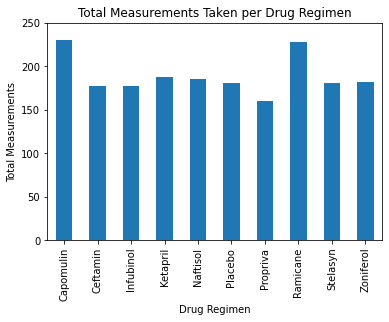

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using Pandas.
total_drugs.plot(kind="bar")
measurements = [230, 178, 178, 188, 186, 181, 160, 228, 181, 182]
plt.ylim(0, max(measurements)+20)
plt.title("Total Measurements Taken per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements");

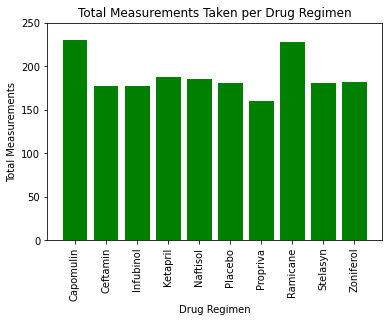

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using PyPlot.
Drug_Regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
measurements = [230, 178, 178, 188, 186, 181, 160, 228, 181, 182]
x_axis = np.arange(len(measurements))
plt.bar(x_axis, measurements, color="g", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Regimen, rotation="vertical")
plt.ylim(0, max(measurements)+20)
plt.title("Total Measurements Taken per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements");

In [24]:
# Total number of females and males in study
grouped_sex = final_mice.groupby(['Sex'])
total_sex = grouped_sex["Sex"].count()
total_sex

Sex
Female    934
Male      958
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

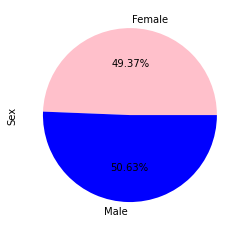

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_sex.plot.pie(labels = ["Female", "Male"], colors = ["pink", "blue"], autopct="%1.2f%%")

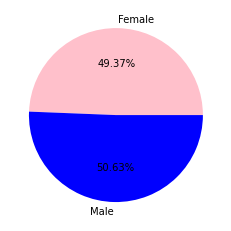

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using PyPlot
labels = ["Female", "Male"]
sizes = [934, 958]
colors = ["pink", "blue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.2f%%", startangle=0);

## Quartiles, Outliers and Boxplots

In [110]:
df_i = final_mice.set_index('Drug Regimen')
df_i

,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,
Ramicane,Male,21,16,0,45.000000,0
Ramicane,Male,21,16,5,38.825898,0
Ramicane,Male,21,16,10,35.014271,1
Ramicane,Male,21,16,15,34.223992,1
Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...
Naftisol,Male,9,30,25,63.145652,2
Naftisol,Male,9,30,30,65.841013,3
Naftisol,Male,9,30,35,69.176246,4


In [120]:
new = df_i.drop(index=['Naftisol'])
next = new.drop(index=['Placebo'])
next

,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,
Ramicane,Male,21,16,0,45.000000,0
Ramicane,Male,21,16,5,38.825898,0
Ramicane,Male,21,16,10,35.014271,1
Ramicane,Male,21,16,15,34.223992,1
Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...
Infubinol,Female,24,25,25,54.316407,2
Infubinol,Female,24,25,30,56.286750,2
Infubinol,Female,24,25,35,58.628399,3


In [ ]:
[ "Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"]

In [116]:
new = df_i.drop(index=['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoneiferol'])
new

KeyError: "['Ketapril' 'Naftisol' 'Placebo' 'Propriva' 'Stelasyn' 'Zoneiferol'] not found in axis"

grouped = final_mice.groupby(['Drug Regimen','Mouse_ID'])
grouped.head()

In [162]:
grouped = final_mice.groupby(['Drug Regimen','Mouse_ID']) 
grouped.head()
sum = grouped.sum()
sum.head(26)

Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse_ID                                                          
Capomulin    b128              90         220        225          419.636356   
             b742              70         210        225          400.836993   
             f966              80          85         50          182.529864   
             g288              30         190        225          419.900966   
             g316             220         220        225          446.133439   
             i557              10         240        225          448.058097   
             i738             230         200        225          391.410528   
             j119              70         230        225          444.652363   
             j246             168         168        140          345.735397   
             l509             170         210        225          444.344738   
             l897             170         190        225          425.072610   
             m601             220         170        225          348.474699   
             m957              30         190        225          390.498164   
             r157              88         100         30          183.195878   
             r554              80         170        225          365.092120   
             r944             120         250        225          433.673645   
             s185              30         170        225          345.591434   
             s710              10         230        225          428.037330   
             t565             200         170        225          393.287251   
             u364             180         170        225          398.874952   
             v923             190         210        225          415.815951   
             w150              69          69         15          124.154476   
             w914             240         210        225          413.524523   
             x401             160         150        225          361.820396   
             y793             170         170        225          385.068292   
Ceftamin     a275             200         280        225          527.709651   

                       Metastatic Sites  
Drug Regimen Mouse_ID                    
Capomulin    b128                     7  
             b742                     0  
             f966                     0  
             g288                     8  
             g316                    10  
             i557                     2  
             i738                     6  
             j119                     6  
             j246                     2  
             l509                    14  
             l897                     4  
             m601                     9  
             m957                     9  
             r157                     0  
             r554                    22  
             r944                     9  
             s185                     4  
             s710                     6  
             t565                     0  
             u364                    18  
             v923                     9  
             w150                     0  
             w914                     5  
             x401                     0  
             y793                    14  
Ceftamin     a275                    12

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
grouped.count().head(10)
# Start by getting the last (greatest) timepoint for each mouse
volume = grouped['Tumor Volume (mm3)'].sum()
volume
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Drug Regimen  Mouse_ID
Capomulin     b128        419.636356
              b742        400.836993
              f966        182.529864
              g288        419.900966
              g316        446.133439
                             ...    
Zoniferol     q633        561.248960
              s337        515.151549
              w140         92.717952
              w575        566.275607
              x613        185.992863
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [129]:
large = final_mice.max(axis=1)
large

Mouse_ID
k403    45.000000
k403    38.825898
k403    35.014271
k403    34.223992
k403    32.997729
          ...    
z969    63.145652
z969    65.841013
z969    69.176246
z969    70.314904
z969    73.867845
Length: 1892, dtype: float64

In [77]:
grouped.drop(index='Placebo')

AttributeError: 'DataFrameGroupBy' object has no attribute 'drop'

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [121]:
final_mice

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse_ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [126]:
grouped = final_mice.groupby(['Timepoint'])
print(grouped)
grouped.tail(10)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse_ID,,,,,,,
x773,Placebo,Female,21,30,30,52.813115,4
x773,Placebo,Female,21,30,35,55.192736,4
x773,Placebo,Female,21,30,40,55.987676,4
x773,Placebo,Female,21,30,45,58.634971,4
x822,Ceftamin,Male,3,29,15,49.694665,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [133]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = final_mice.loc['f966']
capomulin_mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse_ID,,,,,,,
f966,Capomulin,Male,16,17,0,45.000000,0
f966,Capomulin,Male,16,17,5,38.796474,0
f966,Capomulin,Male,16,17,10,35.624403,0
f966,Capomulin,Male,16,17,15,32.623003,0
f966,Capomulin,Male,16,17,20,30.485985,0


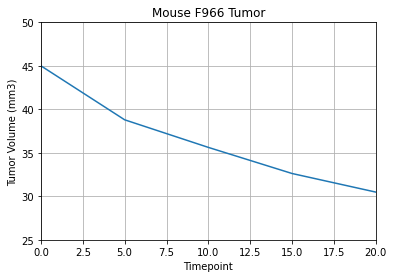

In [145]:
x_axis = [0, 5, 10, 15, 20]
y_axis = [45.0, 38.796474, 35.624403, 32.623003, 30.485985]
plt.plot(x_axis, y_axis)
plt.xlim(0, 20)
plt.ylim(25, max(y_axis)+5)
plt.title("Mouse F966 Tumor")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse_ID                                                          
Capomulin    b128             9.0        22.0       22.5           41.963636   
             b742             7.0        21.0       22.5           40.083699   
             f966            16.0        17.0       10.0           36.505973   
             g288             3.0        19.0       22.5           41.990097   
             g316            22.0        22.0       22.5           44.613344   
             i557             1.0        24.0       22.5           44.805810   
             i738            23.0        20.0       22.5           39.141053   
             j119             7.0        23.0       22.5           44.465236   
             j246            21.0        21.0       17.5           43.216925   
             l509            17.0        21.0       22.5           44.434474   
             l897            17.0        19.0       22.5           42.507261   
             m601            22.0        17.0       22.5           34.847470   
             m957             3.0        19.0       22.5           39.049816   
             r157            22.0        25.0        7.5           45.798970   
             r554             8.0        17.0       22.5           36.509212   
             r944            12.0        25.0       22.5           43.367364   
             s185             3.0        17.0       22.5           34.559143   
             s710             1.0        23.0       22.5           42.803733   
             t565            20.0        17.0       22.5           39.328725   
             u364            18.0        17.0       22.5           39.887495   
             v923            19.0        21.0       22.5           41.581595   
             w150            23.0        23.0        5.0           41.384825   
             w914            24.0        21.0       22.5           41.352452   
             x401            16.0        15.0       22.5           36.182040   
             y793            17.0        17.0       22.5           38.506829   

                       Metastatic Sites  
Drug Regimen Mouse_ID                    
Capomulin    b128                  0.70  
             b742                  0.00  
             f966                  0.00  
             g288                  0.80  
             g316                  1.00  
             i557                  0.20  
             i738                  0.60  
             j119                  0.60  
             j246                  0.25  
             l509                  1.40  
             l897                  0.40  
             m601                  0.90  
             m957                  0.90  
             r157                  0.00  
             r554                  2.20  
             r944                  0.90  
             s185                  0.40  
             s710                  0.60  
             t565                  0.00  
             u364                  1.80  
             v923                  0.90  
             w150                  0.00  
             w914                  0.50  
             x401                  0.00  
             y793                  1.40

In [169]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_mice = final_mice.groupby(['Drug Regimen','Mouse_ID']) 
average = grouped_mice.mean()
capomulin = average.head(25)
capomulin

Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse_ID                                                          
Capomulin    b128             9.0        22.0       22.5           41.963636   
             b742             7.0        21.0       22.5           40.083699   
             f966            16.0        17.0       10.0           36.505973   
             g288             3.0        19.0       22.5           41.990097   
             g316            22.0        22.0       22.5           44.613344   
             i557             1.0        24.0       22.5           44.805810   
             i738            23.0        20.0       22.5           39.141053   
             j119             7.0        23.0       22.5           44.465236   
             j246            21.0        21.0       17.5           43.216925   
             l509            17.0        21.0       22.5           44.434474   
             l897            17.0        19.0       22.5           42.507261   
             m601            22.0        17.0       22.5           34.847470   
             m957             3.0        19.0       22.5           39.049816   
             r157            22.0        25.0        7.5           45.798970   
             r554             8.0        17.0       22.5           36.509212   
             r944            12.0        25.0       22.5           43.367364   
             s185             3.0        17.0       22.5           34.559143   
             s710             1.0        23.0       22.5           42.803733   
             t565            20.0        17.0       22.5           39.328725   
             u364            18.0        17.0       22.5           39.887495   
             v923            19.0        21.0       22.5           41.581595   
             w150            23.0        23.0        5.0           41.384825   
             w914            24.0        21.0       22.5           41.352452   
             x401            16.0        15.0       22.5           36.182040   
             y793            17.0        17.0       22.5           38.506829   

                       Metastatic Sites  
Drug Regimen Mouse_ID                    
Capomulin    b128                  0.70  
             b742                  0.00  
             f966                  0.00  
             g288                  0.80  
             g316                  1.00  
             i557                  0.20  
             i738                  0.60  
             j119                  0.60  
             j246                  0.25  
             l509                  1.40  
             l897                  0.40  
             m601                  0.90  
             m957                  0.90  
             r157                  0.00  
             r554                  2.20  
             r944                  0.90  
             s185                  0.40  
             s710                  0.60  
             t565                  0.00  
             u364                  1.80  
             v923                  0.90  
             w150                  0.00  
             w914                  0.50  
             x401                  0.00  
             y793                  1.40

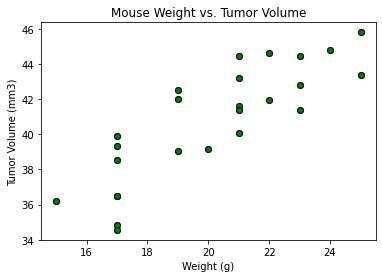

In [192]:
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black")
plt.title("Mouse Weight vs. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show;

## Correlation and Regression

In [185]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


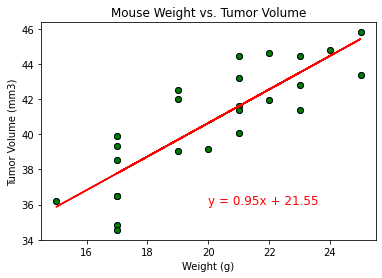

In [193]:
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.title("Mouse Weight vs. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()